### Lectura del dataset como dataframe

In [1]:
### Lectura del dataset como dataframe

import pandas as pd

ruta = 'bbc_data.csv'
# Leer un archivo CSV (si ya lo tienes subido)
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


### Se realiza preprocesado a las noticias, junto con TF-IDF para entrenar un modelo de ML, en concreto una regresión logística para predecir a que categoría pertenece cada noticia

In [2]:
### Se realiza preprocesado a las noticias, junto con TF-IDF para entrenar un modelo de ML, en concreto una regresión logística para predecir a que categoría pertenece cada noticia

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Minúsculas
    text = text.lower()
    # Quitar signos de puntuación
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Tokenizar
    tokens = nltk.word_tokenize(text)
    # Quitar stopwords y lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Aplicar al dataframe
df['clean_text'] = df['data'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador
vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar al texto y transformar
X_tfidf = vectorizer.fit_transform(df['clean_text'])

In [4]:
from sklearn.model_selection import train_test_split

# Definir variables
X = X_tfidf
y = df['labels']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

               precision    recall  f1-score   support

     business       0.97      0.98      0.98       102
entertainment       0.97      0.99      0.98        77
     politics       1.00      0.98      0.99        84
        sport       0.99      1.00      1.00       102
         tech       0.99      0.97      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



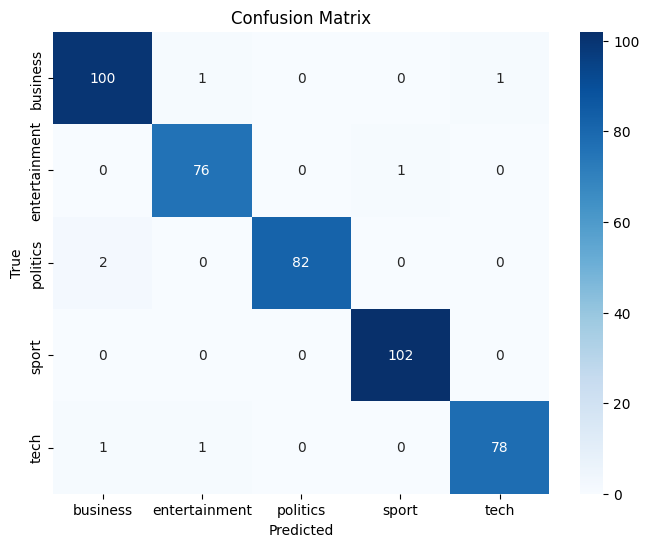

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
